  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

C:\Users\NJERI\AppData\Local\Temp\ipykernel_11588\3851957594.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = pd.to_datetime(df_clean['date'])
C:\Users\NJERI\AppData\Local\Temp\ipykernel_11588\3851957594.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_cases'] = df_clean['total_cases'].interpolate()


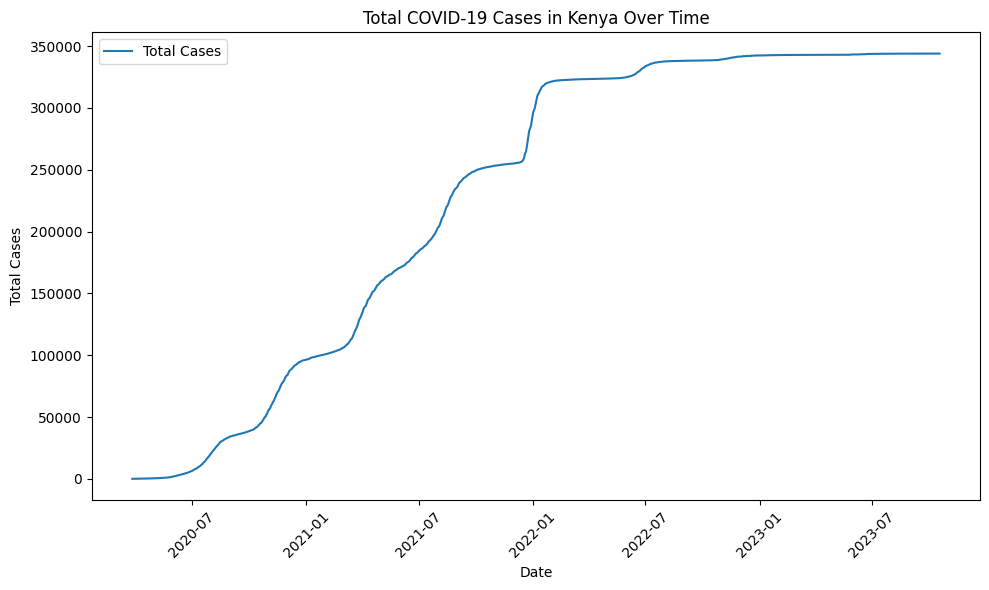

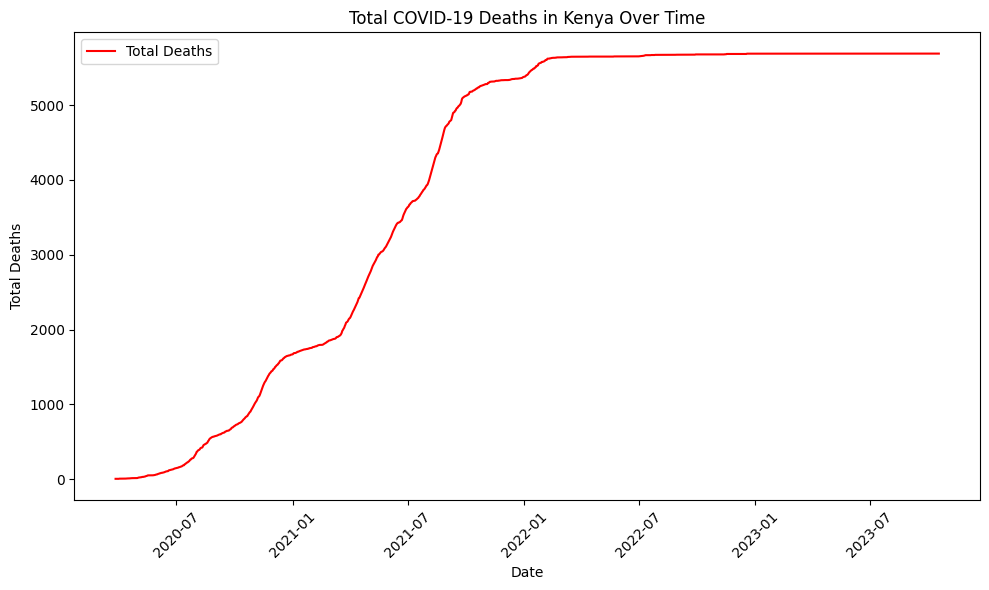

C:\Users\NJERI\AppData\Local\Temp\ipykernel_11588\3851957594.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kenya['death_rate'] = df_kenya['total_deaths'] / df_kenya['total_cases']


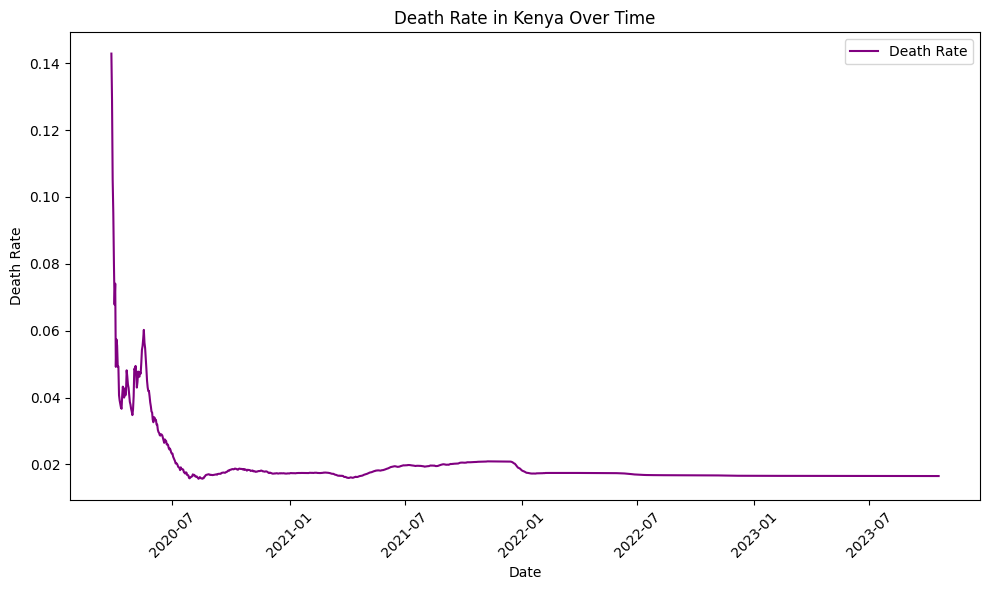

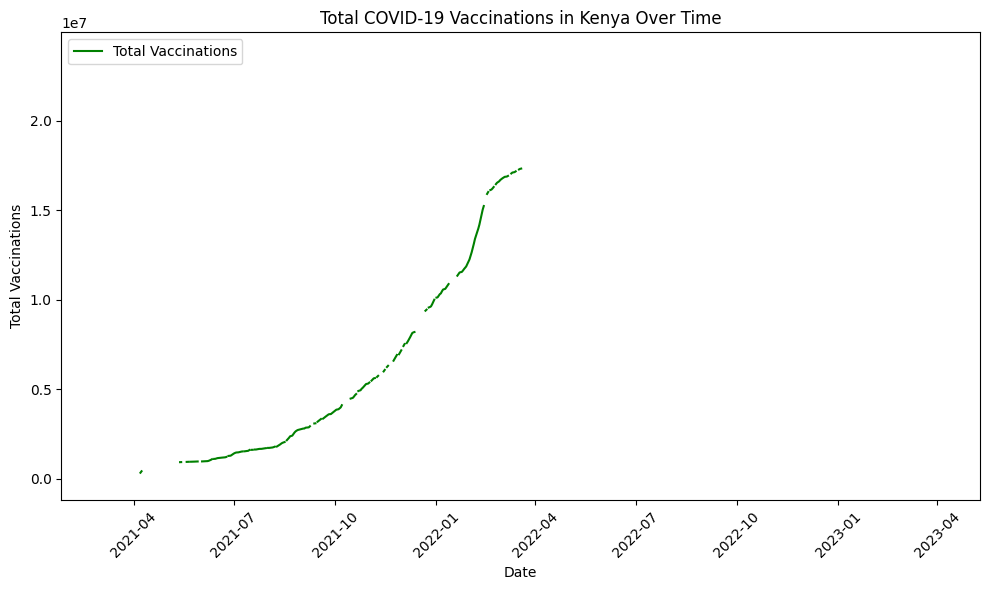

C:\Users\NJERI\AppData\Local\Temp\ipykernel_11588\3851957594.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kenya['vaccination_rate'] = df_kenya['total_vaccinations'] / df_kenya['population'] * 100


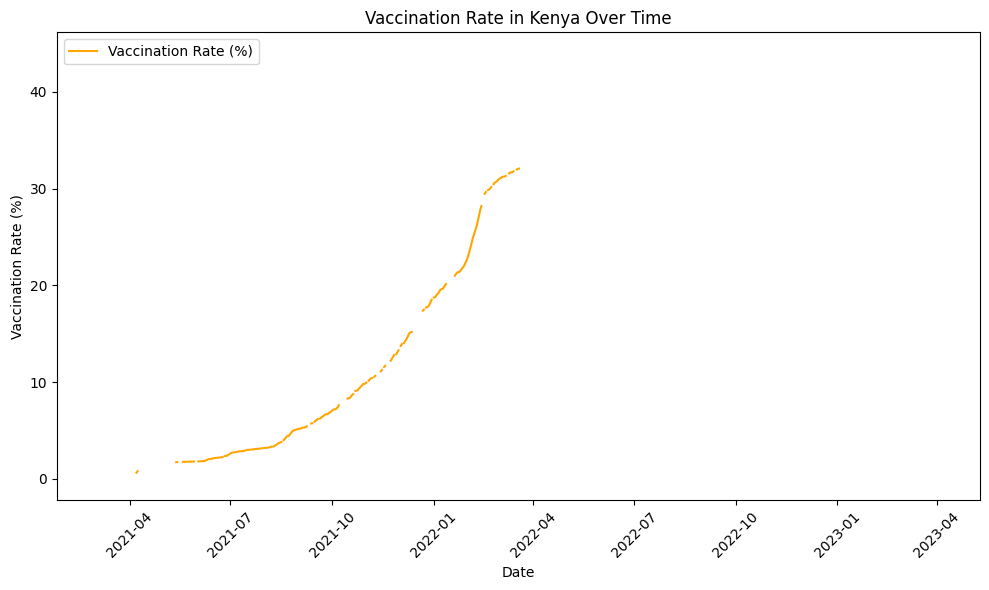

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\Users\NJERI\Desktop\Covid 19 project\owid-covid-data.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Filter for selected countries
df_selected = df[df['location'].isin(['Kenya', 'USA', 'India'])]

# Drop rows with missing critical data
df_clean = df_selected.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Convert 'date' to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Interpolate missing total_cases
df_clean['total_cases'] = df_clean['total_cases'].interpolate()

# Focus on Kenya
df_kenya = df_clean[df_clean['location'] == 'Kenya']

# Plot Total Cases
plt.figure(figsize=(10, 6))
plt.plot(df_kenya['date'], df_kenya['total_cases'], label='Total Cases')
plt.title('Total COVID-19 Cases in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Total Deaths
plt.figure(figsize=(10, 6))
plt.plot(df_kenya['date'], df_kenya['total_deaths'], label='Total Deaths', color='red')
plt.title('Total COVID-19 Deaths in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Death Rate
df_kenya['death_rate'] = df_kenya['total_deaths'] / df_kenya['total_cases']

plt.figure(figsize=(10, 6))
plt.plot(df_kenya['date'], df_kenya['death_rate'], label='Death Rate', color='purple')
plt.title('Death Rate in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Vaccinations
plt.figure(figsize=(10, 6))
plt.plot(df_kenya['date'], df_kenya['total_vaccinations'], label='Total Vaccinations', color='green')
plt.title('Total COVID-19 Vaccinations in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Vaccination Rate
df_kenya['vaccination_rate'] = df_kenya['total_vaccinations'] / df_kenya['population'] * 100

plt.figure(figsize=(10, 6))
plt.plot(df_kenya['date'], df_kenya['vaccination_rate'], label='Vaccination Rate (%)', color='orange')
plt.title('Vaccination Rate in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
